In [131]:
import csv 
from statistics import mean
import matplotlib.pyplot as plt

In [132]:
file = open('Documents/pyro_models/plots/multi_sample_30_scatter/test_csv.csv')

In [133]:
csvreader = csv.reader(file)
header = []
header = next(csvreader)
print(header)

['real_mean_u', 'posterior_mean_u', 'real_sigma_u', 'posterior_sigma_u', 'real_sigma_es', 'posterior_sigma_es']


In [134]:
def add_posterior(key, dic, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key]= []
        dic[key].append(value)
        

# sort every paramter in from small to big order
def rearrange_mean(dict):
    post_dict = {}
    # a list of all the keys only from small to big
    sorted_list = sorted(dict)
    print(sorted_list)
    for key in sorted_list:
        post_dict[key] = mean(dict[key])
    return post_dict

In [135]:
mean_u = {}
sigma_u = {}
sigma_es = {}
real_mean_u_scatter = []
posterior_mean_u_scatter = []
real_sigma_u_scatter = []
posterior_sigma_u_scatter = []
real_sigma_es_scatter = []
posterior_sigma_es_scatter = []

gut_real_mean_u_scatter = []
gut_posterior_mean_u_scatter = []
gut_real_sigma_u_scatter = []
gut_posterior_sigma_u_scatter = []
gut_real_sigma_es_scatter = []
gut_posterior_sigma_es_scatter = []
for row in csvreader:
    real_mean_u_scatter.append(round(float(row[0]), 2))
    posterior_mean_u_scatter.append(round(float(row[1]), 2))
    real_sigma_u_scatter.append(round(float(row[2]), 2))
    posterior_sigma_u_scatter.append(round(float(row[3]), 2))
    real_sigma_es_scatter.append(round(float(row[4]), 2))
    posterior_sigma_es_scatter.append(round(float(row[5]), 2))
    
    add_posterior(float(row[0]), mean_u, float(row[1]))
    add_posterior(float(row[2]), sigma_u, float(row[3]))
    add_posterior(float(row[4]), sigma_es, float(row[5]))

    gut = abs(float(row[0]) + float(row[2]) + float(row[4]) - float(row[1]) - float(row[3]) - float(row[5]))
    if gut <= 6:
        gut_real_mean_u_scatter.append(round(float(row[0]), 2))
        gut_posterior_mean_u_scatter.append(round(float(row[1]), 2))
        gut_real_sigma_u_scatter.append(round(float(row[2]), 2))
        gut_posterior_sigma_u_scatter.append(round(float(row[3]), 2))
        gut_real_sigma_es_scatter.append(round(float(row[4]), 2))
        gut_posterior_sigma_es_scatter.append(round(float(row[5]), 2))

file.close()

In [118]:
mean_mean_u = rearrange_mean(mean_u)
mean_sigma_u = rearrange_mean(sigma_u)
mean_sigma_es = rearrange_mean(sigma_es)

[0.24242424242424243, 0.32323232323232326, 0.48484848484848486, 0.8080808080808082, 1.0505050505050506, 1.2121212121212122, 1.373737373737374, 1.8585858585858588, 2.0202020202020203, 2.262626262626263, 2.666666666666667, 2.8282828282828287, 4.363636363636364, 4.767676767676768, 5.818181818181818, 6.141414141414142, 6.222222222222222, 6.383838383838384, 6.626262626262627, 6.94949494949495, 7.030303030303031, 7.595959595959597, 7.676767676767677]
[0.4135353535353536, 0.8170707070707072, 0.8977777777777779, 1.2206060606060607, 1.6241414141414143, 1.7855555555555558, 2.0276767676767675, 2.2697979797979797, 2.3505050505050504, 2.754040404040404, 2.834747474747475, 2.9154545454545455, 2.9961616161616162, 3.076868686868687, 3.39969696969697, 3.883939393939394, 5.094545454545455, 5.65949494949495, 5.820909090909091, 6.063030303030303, 6.466565656565657, 6.547272727272728, 6.6279797979797985, 6.708686868686869, 7.273636363636364, 7.5157575757575765, 7.677171717171718, 7.757878787878788]
[0.4136

In [119]:
# separate the keys and the values into two lists to plot
real_mean_u, posterior_mean_u = zip(*mean_mean_u.items())
real_sigma_u, posterior_sigma_u = zip(*mean_sigma_u.items())
real_sigma_es, posterior_sigma_es = zip(*mean_sigma_es.items())

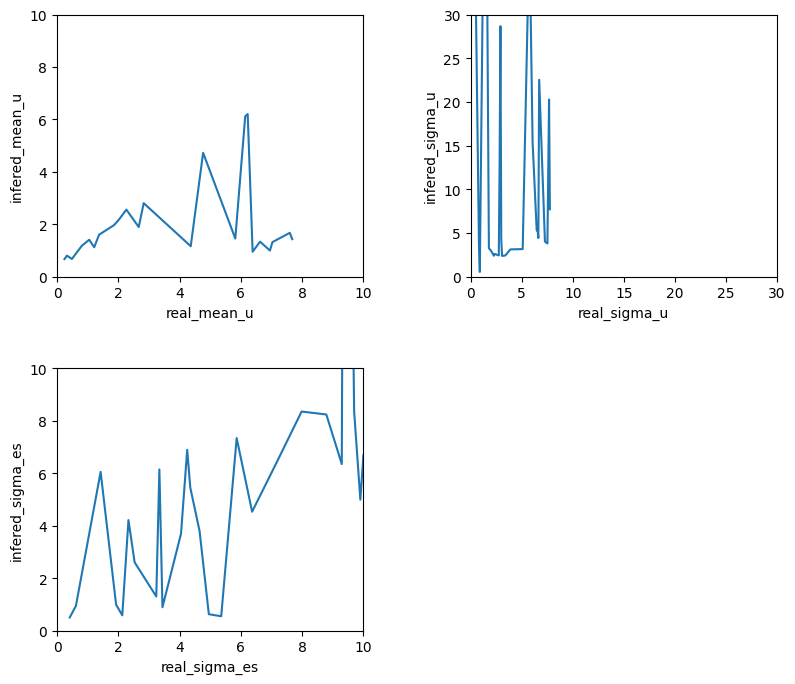

In [120]:
# plot the posterior with simulated data
fig = plt.figure(constrained_layout=False, figsize=(8,8))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.95, wspace=0.35, hspace=0.35)

ax1 = fig.add_subplot(gs[0,0], xlim = [0,10], ylim = [0,10], xlabel = 'real_mean_u', ylabel = 'infered_mean_u')
ax2 = fig.add_subplot(gs[0,1], xlim = [0,30], ylim = [0,30], xlabel = 'real_sigma_u', ylabel = 'infered_sigma_u')
ax3 = fig.add_subplot(gs[1,0], xlim = [0,10], ylim = [0,10], xlabel = 'real_sigma_es', ylabel = 'infered_sigma_es')

ax1.plot(real_mean_u, posterior_mean_u)
ax2.plot(real_sigma_u, posterior_sigma_u)
ax3.plot(real_sigma_es, posterior_sigma_es)

plt.show()
plt.close()


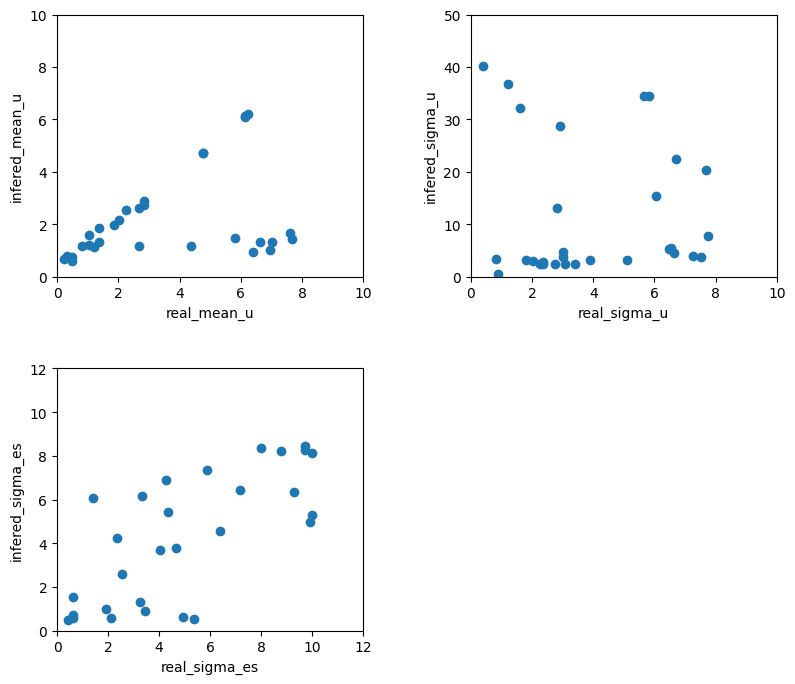

In [127]:
# plot the posterior with simulated data
fig = plt.figure(constrained_layout=False, figsize=(8,8))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.95, wspace=0.35, hspace=0.35)

ax1 = fig.add_subplot(gs[0,0], xlim = [0,10], ylim = [0,10], xlabel = 'real_mean_u', ylabel = 'infered_mean_u')
ax2 = fig.add_subplot(gs[0,1], xlim = [0,10], ylim = [0,50], xlabel = 'real_sigma_u', ylabel = 'infered_sigma_u')
ax3 = fig.add_subplot(gs[1,0], xlim = [0,12], ylim = [0,12], xlabel = 'real_sigma_es', ylabel = 'infered_sigma_es')

ax1.scatter(real_mean_u_scatter, posterior_mean_u_scatter)
ax2.scatter(real_sigma_u_scatter, posterior_sigma_u_scatter)
ax3.scatter(real_sigma_es_scatter, posterior_sigma_es_scatter)

plt.show()
plt.close()

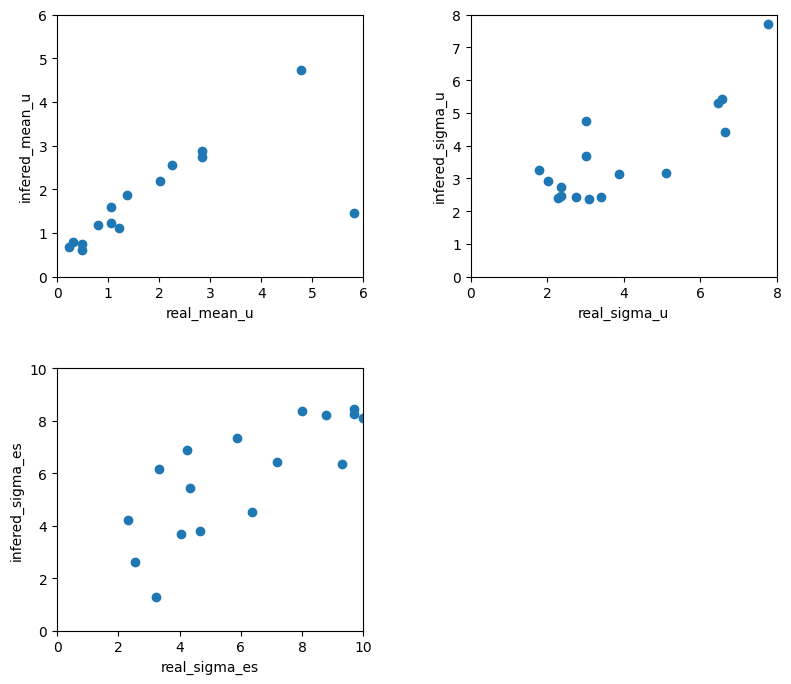

In [137]:
# plot the posterior with simulated data
fig = plt.figure(constrained_layout=False, figsize=(8,8))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.95, wspace=0.35, hspace=0.35)

ax1 = fig.add_subplot(gs[0,0], xlim = [0,6], ylim = [0,6], xlabel = 'real_mean_u', ylabel = 'infered_mean_u')
ax2 = fig.add_subplot(gs[0,1], xlim = [0,8], ylim = [0,8], xlabel = 'real_sigma_u', ylabel = 'infered_sigma_u')
ax3 = fig.add_subplot(gs[1,0], xlim = [0,10], ylim = [0,10], xlabel = 'real_sigma_es', ylabel = 'infered_sigma_es')

ax1.scatter(gut_real_mean_u_scatter, gut_posterior_mean_u_scatter)
ax2.scatter(gut_real_sigma_u_scatter, gut_posterior_sigma_u_scatter)
ax3.scatter(gut_real_sigma_es_scatter, gut_posterior_sigma_es_scatter)

plt.show()
plt.close()